In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 单变量分布

array([-0.00890435,  1.15059928,  0.40278938,  0.24633727,  1.73802331,
       -0.89281161,  0.73813993,  0.44673555,  0.97203936,  0.84198202,
        1.01442955,  0.42419202,  0.90801568,  0.6992309 ,  1.59687827,
       -0.17947167,  0.34412353,  0.44505559,  1.62895512, -0.93905939,
        0.5297345 ,  0.5657571 ,  0.86680674,  1.19753495,  2.05768961,
       -0.29378898, -0.82540951, -0.37339039,  0.92141462,  0.6260136 ,
       -1.93074742,  1.16356455, -0.97934976, -0.97910254,  0.72236889,
        0.13485459, -0.13713938, -0.36319315, -0.83589725, -1.73014248,
        1.72108265, -1.463021  ,  1.11355052,  0.53127204, -0.24402982,
        0.52699404, -0.22413978, -0.77900972, -0.99684458, -0.2882618 ,
       -0.1488389 , -1.79132904, -0.43034113,  0.94084034, -0.20415689,
        0.82189591, -1.86556815, -0.07435733,  0.09765706, -1.55755923,
       -0.82611913,  0.64463017, -0.06322995,  0.15572078, -1.03734413,
       -0.24128787, -1.15897387, -0.22583667, -1.01285422, -0.77

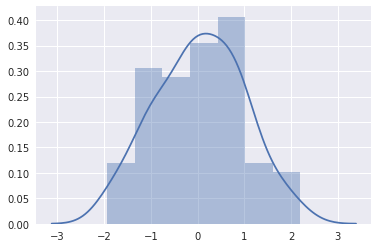

In [2]:
#单变量分布

x = np.random.normal(size=100)
sns.distplot(x);

x

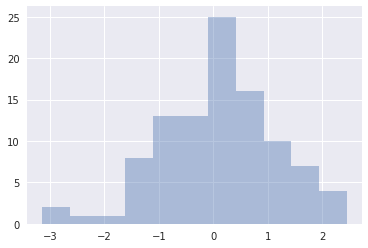

In [3]:
#密度线可以去掉
y = np.random.normal(size=100)
sns.distplot(y,kde=False)

## 直方图
在matplotlib中就存在hist函数。直方图通过在数据的范围内切成数据片段，然后绘制每个数据片段中的观察次数，来表示整体数据的分布。

绘制直方图时，主要的选择是使用切分数据片段的数量或在何位置切分数据片段。 distplot()使用一个简单的规则来很好地猜测并给予默认的切分数量，但尝试更多或更少的数据片段可能会显示出数据中的其他特征：

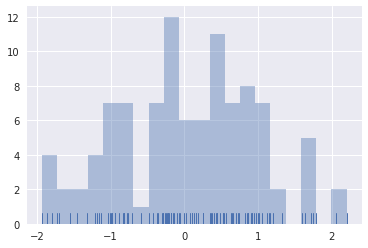

In [4]:
sns.distplot(x, bins=20, kde=False, rug=True);  ##直方图中的bin(数据切分数量参数)

## 核密度估计(KDE) Kernel density estimaton
如同直方图一样，KDE图会对一个轴上的另一轴的高度的观测密度进行描述：

KDE的带宽bandwidth（bw）参数控制估计对数据的拟合程度

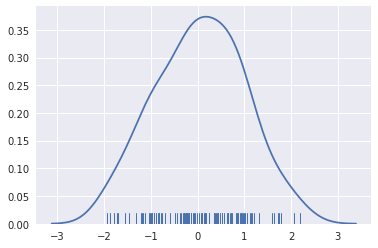

In [5]:
sns.distplot(x, hist=False, rug=True);

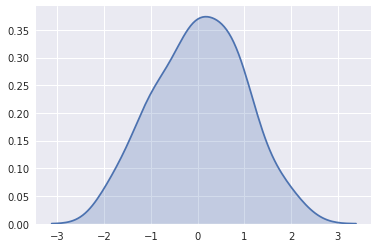

In [6]:
sns.kdeplot(x, shade=True); #更直接的估计函数

## 拟合参数分布
还可以使用distplot()将参数分布拟合到数据集，并可视化地评估其与观察数据的对应关系

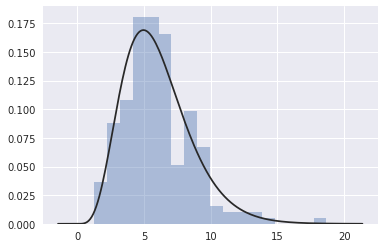

In [7]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

# 绘制双变量分布

In [8]:
mean, cov = [0, 1], [(1, 0.5), (0.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

In [ ]:
df

# 散点图  
可以使用matplotlib中的plt.scatter函数绘制散点图，它也是jointplot()函数显示的默认方式。

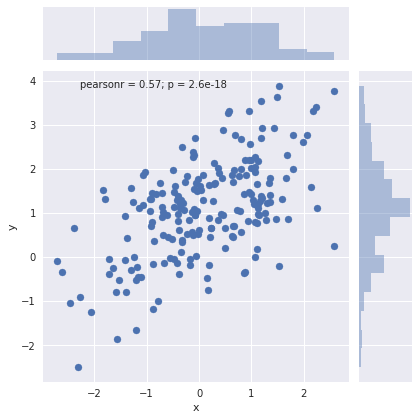

In [10]:
sns.jointplot(x="x", y="y", data=df);

# HexBin图 
直方图的双变量类似物被称为“hexbin”图，因为它显示了落在六边形仓内的观测数。该图适用于较大的数据集
# 核密度估计
使用上述内核密度估计程序可视化双变量分布也是可行的。在seaborn中，这种图用等高线图显示，可以在jointplot()中作为样式传入参数使用：


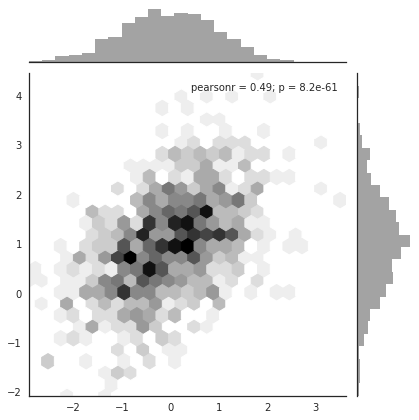

In [11]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

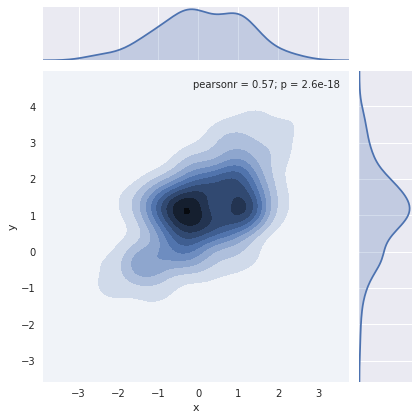

In [12]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

# 呈现数据集中成对的关系
要在数据集中绘制多个成对双变量分布，可以使用pairplot()函数

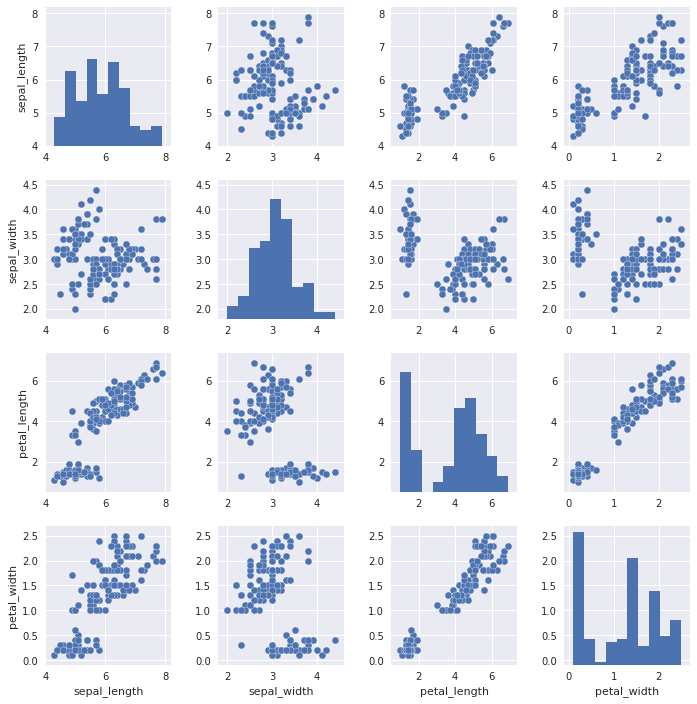

In [13]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

# 线性关系的可视化
 https://zhuanlan.zhihu.com/p/27593869  拟合线，暂时用不上

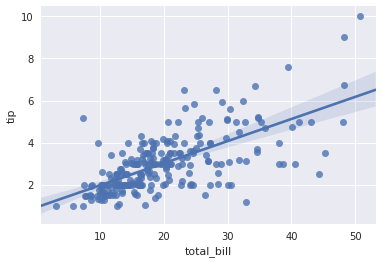

In [14]:
np.random.seed(sum(map(ord, "regression")))

tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips);


# 分类数据的绘制
非常实用的方法是将Seaborn的分类图分为三类，将分类变量每个级别的每个观察结果显示出来，显示每个观察分布的抽象表示，以及应用统计估计显示的权重趋势和置信区间：

第一个包括函数swarmplot()和stripplot()
第二个包括函数boxplot()和violinplot()
第三个包括函数barplot()和pointplt()

In [15]:
np.random.seed(sum(map(ord, "categorical"))) #string 上应用map的ord(char->unicode) 后求和，产生随机seed
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

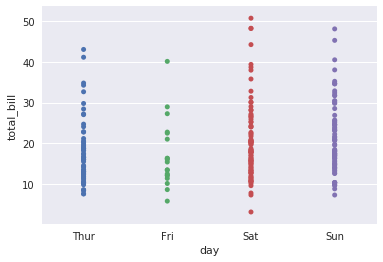

In [16]:
# 分类散点图
sns.stripplot(x="day", y="total_bill", data=tips);

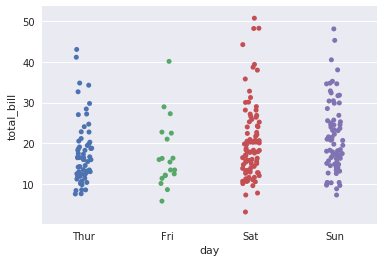

In [17]:
# 加上抖动参数放宽后更容易看到分布
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

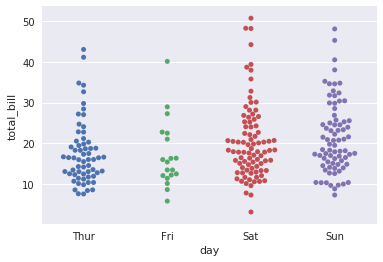

In [18]:
##更优，杜绝重叠
sns.swarmplot(x="day", y="total_bill", data=tips);

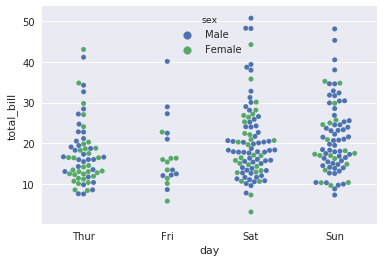

In [19]:
#hue
sns.swarmplot(x="day", y="total_bill", hue="sex",data=tips);

# 箱线图 
分类内的观测分布

第一个是熟悉的boxplot()。这种图形显示了分布的三个四分位值与极值。
“晶须”延伸到低于和低四分位数的1.5 IQR内的点，然后独立显示落在该范围之外的观测值。 
重要的是，这意味着boxplot中的每个值的显示都对应于数据中的实际观察值

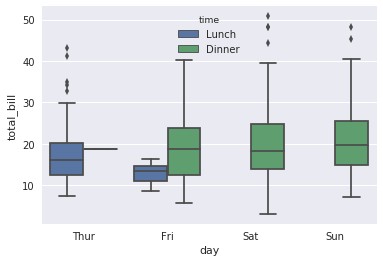

In [20]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

# 提琴图 violinplot
它结合了箱体图和分布教程中描述的核心密度估计过程：
这种方法使用核密度估计来更好地描述值的分布。此外，小提琴内还显示了箱体四分位数和晶须值。

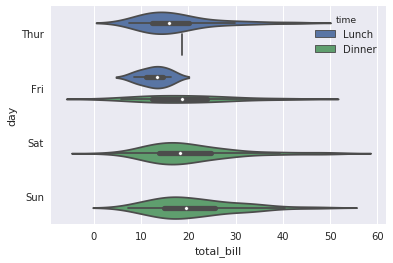

In [21]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);


## 条形图 barplot
在Seaborn中barplot()函数在完整数据集上运行，并显示任意估计，默认情况下使用均值。 当在每个类别中有多个观察值时，它还使用引导来计算估计周围的置信区间，并绘制使用误差条：

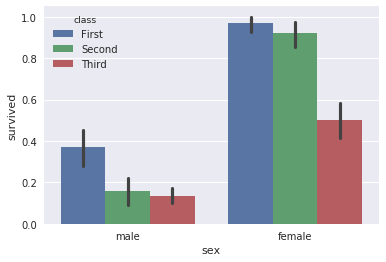

In [22]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

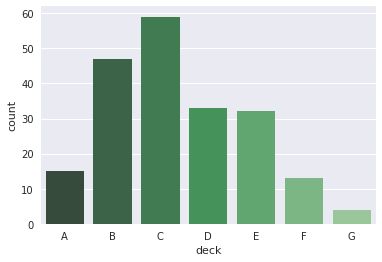

In [23]:
#### countplot  计数
#条形图的特殊情况是当您想要显示每个类别中的观察次数，而不是计算第二个变量的统计量。
#这类似于分类而不是定量变量的直方图。在Seaborn中，使用countplot()函数很容易绘制：

sns.countplot(x="deck", data=titanic, palette="Greens_d");

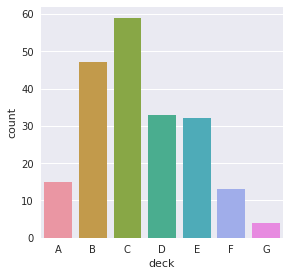

In [24]:
#countplot 同等，但是可以调整图size
sns.factorplot(x="deck",data=titanic, kind="count",size=4)

# 点图 pointplot
pointplot()该函数还对另一轴的高度估计值进行编码，而不是显示一个完整的柱型，它只绘制点估计和置信区间。另外，点图连接相同hue类别的点。这使得很容易看出主要关系如何随着第二个变量的变化而变化，因为你的眼睛很好地收集斜率的差异：

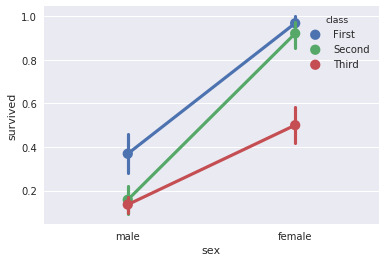

In [25]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

####Pandas 的饼图 pie
http://pandas.pydata.org/pandas-docs/stable/visualization.html#pie-plot
 两个参数： pd的index列通常做label，  那么 y=['col'] 某些列，  subplots 决定是否每列分开一个图例

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd75fa0eac8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fd7570cae48>], dtype=object)

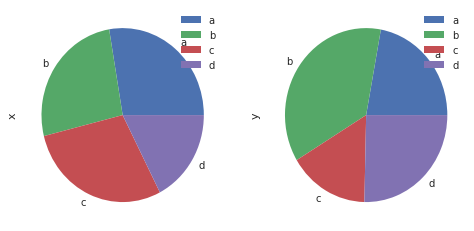

In [3]:
#type_g.plot.pie(y=['appId'],autopct='%.2f')

df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df.plot.pie(subplots=True, figsize=(8, 4))